<a href="https://colab.research.google.com/github/elhamod/BA820/blob/main/Hands-on/04-text-mining/BA820_In_class_exercise_half_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sentence-transformers
!pip install umap-learn
!pip install yellowbrick
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

## Loading The Dataset

We will try to analyze and pull insights from a board game reviews dataset.

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "2022-01-08.csv"

# Load the latest version
df_ratings = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jvanelteren/boardgamegeek-reviews",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

file_path = "bgg-15m-reviews.csv"

df_reviews = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jvanelteren/boardgamegeek-reviews",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


file_path = "games_detailed_info2025.csv"

df_game_details = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jvanelteren/boardgamegeek-reviews",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

<ipython-input-2-00099517c00c>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_ratings = kagglehub.load_dataset(


100%|██████████| 4.82M/4.82M [00:01<00:00, 2.65MB/s]
<ipython-input-2-00099517c00c>:22: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_reviews = kagglehub.load_dataset(


100%|██████████| 1.30G/1.30G [01:24<00:00, 16.5MB/s]
<ipython-input-2-00099517c00c>:35: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_game_details = kagglehub.load_dataset(


100%|██████████| 105M/105M [00:08<00:00, 13.3MB/s]


In [3]:
df_ratings = df_ratings[df_ratings["Users rated"] > 10000].head(100)

df_reviews = df_reviews[df_reviews["comment"].notna() ]

df_reviews = (
    df_reviews[df_reviews["ID"].isin(df_ratings["ID"].to_list())]
    .groupby("ID")  # Group by game ID
    .head(30)  # Keep only the first 30 reviews per game
    .reset_index(drop=True)  # Reset index for clean output
)

df_game_details = df_game_details[df_game_details["id"].isin(df_ratings["ID"].to_list())]

In [4]:
df_ratings

,Unnamed: 0,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,105,30549,Pandemic,2008,106,7.59,7.487,108975,/boardgame/30549/pandemic,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...
1,189,822,Carcassonne,2000,190,7.42,7.309,108738,/boardgame/822/carcassonne,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...
2,428,13,Catan,1995,429,7.14,6.970,108024,/boardgame/13/catan,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...
3,72,68448,7 Wonders,2010,73,7.74,7.634,89982,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...
4,103,36218,Dominion,2008,104,7.61,7.499,81561,/boardgame/36218/dominion,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...
...,...,...,...,...,...,...,...,...,...,...
95,312,172,For Sale,1997,313,7.23,7.108,25665,/boardgame/172/sale,https://cf.geekdo-images.com/dJh9HkZC346NgPTAi...
96,8,182028,Through the Ages: A New Story of Civilization,2015,9,8.38,8.150,25605,/boardgame/182028/through-ages-new-story-civil...,https://cf.geekdo-images.com/fVwPntkJKgaEo0rIC...
97,7,187645,Star Wars: Rebellion,2016,8,8.42,8.172,25586,/boardgame/187645/star-wars-rebellion,https://cf.geekdo-images.com/7SrPNGBKg9IIsP4UQ...
98,2,224517,Brass: Birmingham,2018,3,8.66,8.418,25484,/boardgame/224517/brass-birmingham,https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...


In [5]:
df_game_details

,Unnamed: 0,type,id,thumbnail,image,alternate,description,yearpublished,minplayers,maxplayers,...,boardgameintegration,Abstract Game Rank,Party Game Rank,Thematic Rank,War Game Rank,Customizable Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,name
0,0,boardgame,13,https://cf.geekdo-images.com/PyUol9QxBnZQCJqZI...,https://cf.geekdo-images.com/PyUol9QxBnZQCJqZI...,"['Catan', 'Catan (Колонизаторы)', 'Catan telep...","In CATAN (formerly The Settlers of Catan), pla...",1995,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CATAN
1,1,boardgame,822,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,"['Carcassonne Jubilee Edition', 'Carcassonne: ...",Carcassonne is a tile placement game in which ...,2000,2,5,...,"['Carcassonne: Wheel of Fortune', 'Mists over ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carcassonne
2,2,boardgame,30549,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,"['EPIZOotic', 'Pandemia', 'Pandemia 10 Anivers...","In Pandemic, several virulent diseases have br...",2008,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pandemic
3,3,boardgame,68448,https://cf.geekdo-images.com/35h9Za_JvMMMtx_92...,https://cf.geekdo-images.com/35h9Za_JvMMMtx_92...,"['7 csoda', '7 Cudów Świata', '7 divů světa', ...",You are the leader of one of the 7 great citie...,2010,2,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7 Wonders
4,4,boardgame,167791,https://cf.geekdo-images.com/wg9oOLcsKvDesSUdZ...,https://cf.geekdo-images.com/wg9oOLcsKvDesSUdZ...,"['A Mars terraformálása', 'Mars: Teraformace',...","In the 2400s, mankind begins to terraform the ...",2016,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Terraforming Mars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,114,boardgame,18602,https://cf.geekdo-images.com/yC7nOSc1x5PT-oNnh...,https://cf.geekdo-images.com/yC7nOSc1x5PT-oNnh...,"['Caylus Premium Limited Edition', 'ケイラス', '凱呂...",Once upon a time ...&#10;1289. To strengthen t...,2005,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caylus
118,118,boardgame,42,https://cf.geekdo-images.com/soAzNVWglCdVBacNj...,https://cf.geekdo-images.com/soAzNVWglCdVBacNj...,"['Eufraat & Tigris', 'Eufraat en Tigris', 'Euf...",Regarded by many as Reiner Knizia's masterpiec...,1997,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tigris & Euphrates
120,120,boardgame,72125,https://cf.geekdo-images.com/cnFppsVNOSTJ-W3AP...,https://cf.geekdo-images.com/cnFppsVNOSTJ-W3AP...,"['Eclipse', '星蚀', '이클립스']",The galaxy has been a peaceful place for many ...,2011,2,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eclipse: New Dawn for the Galaxy
124,124,boardgame,146508,https://cf.geekdo-images.com/XmwCsjQ3C1Ul53ZN2...,https://cf.geekdo-images.com/XmwCsjQ3C1Ul53ZN2...,"['T.I.MEストーリーズ', 'Time Stories', 'Агентство «В...",The T.I.M.E Agency protects humanity by preven...,2015,2,4,...,NaN,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN,T.I.M.E Stories


In [6]:
df_reviews

,Unnamed: 0,user,rating,comment,ID,name
0,1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
1,2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
2,4,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic
3,5,cfarrell,10.0,Hey! I can finally rate this game I've been pl...,30549,Pandemic
4,8,gregd,10.0,Love it- great fun with my son. 2 plays so far...,30549,Pandemic
...,...,...,...,...,...,...
2995,3669498,Grumdy,10.0,Some of the most fun experiences I've had in t...,244521,The Quacks of Quedlinburg
2996,3679352,pouringraine,10.0,One of my current top 10 games A great game! ...,244521,The Quacks of Quedlinburg
2997,3679360,magicninja7,10.0,This is a very fun bag builder. I have only wo...,244521,The Quacks of Quedlinburg
2998,3679362,naciavarella,10.0,Great push your luck game. Each player starts...,244521,The Quacks of Quedlinburg


#Q1:

Take a look at `df_ratings`. Can you replace the different rating and ranking systems with a single *reliable* summary indicator spanning between 0 and 10?

*Steps:*

- Extract the rating and ranking columns.
- Apply PCA(1)
- See if the amount of information lost is large.
- If not, create a new column with that indicator.

<Axes: >

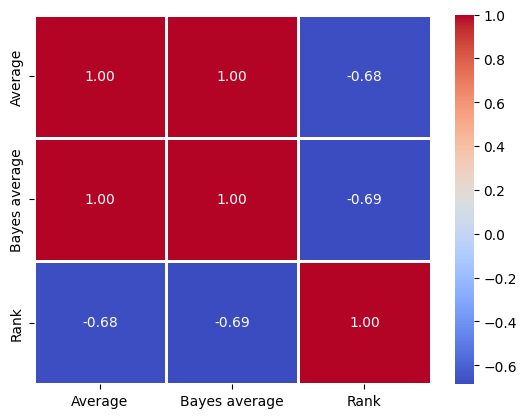

In [7]:
# Extract rating and ranking columns (replace with actual column names if different)
rating_columns = ['Average', 'Bayes average','Rank']  # Example columns, replace with your actual column names
df_ratings_subset = df_ratings[rating_columns]

correlation_matrix = df_ratings_subset.corr()

import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)

In [8]:
# prompt: Extract the rating and ranking columns.
# Apply PCA(1)
# See if the amount of information lost is large.
# If not, create a new column with that indicator.

from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Handle potential non-numeric data:
for col in df_ratings_subset.columns:
  if not pd.api.types.is_numeric_dtype(df_ratings_subset[col]):
      df_ratings_subset[col] = pd.to_numeric(df_ratings_subset[col], errors='coerce')

# Drop rows with NaN values after conversion
df_ratings_subset = df_ratings_subset.dropna()

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Step 1: Normalize the data
scaler = StandardScaler()
df_ratings_subset_scaled = scaler.fit_transform(df_ratings_subset)

# Apply PCA with 1 component
pca = PCA(n_components=1)
pca_result = pca.fit_transform(df_ratings_subset_scaled)

# Explained variance ratio indicates the amount of information retained.
explained_variance_ratio = pca.explained_variance_ratio_[0]

# Check if the information loss is acceptable (e.g., > 85%) - Adjust threshold as needed
if explained_variance_ratio > 0.85:
    # Create a new column with the PCA indicator
    scaler_minmax = MinMaxScaler()
    df_ratings['pca_indicator'] = scaler_minmax.fit_transform(pca_result)*10
    print(f"PCA Indicator created. Explained Variance Ratio: {explained_variance_ratio}")
else:
    print(f"Information loss is too high ({explained_variance_ratio}).  Not creating PCA indicator.")

print(df_ratings.head())


PCA Indicator created. Explained Variance Ratio: 0.8620286970579146
   Unnamed: 0     ID         Name  Year  Rank  Average  Bayes average  \
0         105  30549     Pandemic  2008   106     7.59          7.487   
1         189    822  Carcassonne  2000   190     7.42          7.309   
2         428     13        Catan  1995   429     7.14          6.970   
3          72  68448    7 Wonders  2010    73     7.74          7.634   
4         103  36218     Dominion  2008   104     7.61          7.499   

   Users rated                         URL  \
0       108975   /boardgame/30549/pandemic   
1       108738  /boardgame/822/carcassonne   
2       108024         /boardgame/13/catan   
3        89982  /boardgame/68448/7-wonders   
4        81561   /boardgame/36218/dominion   

                                           Thumbnail  pca_indicator  
0  https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...       8.238085  
1  https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...       7.946090  
2  htt

*Answer:*

The ratings are quite aligned and can be replaced by one value. If 85% information is enough, we can go ahead with it.

#Q2:

Take a look at `df_reviews`. Can you show a 3D plot that visualizes how similar the games are to each other based on the comments associated with them?

*Steps:*

- Choose an embedding, perhaps `SentenceTransformer`.
- Apply the embedding to all the reviews
- Average the embeddings for each game.
- Apply PCA(3) or UMAP(3)
- Visualize


In [9]:
import numpy as np

from sentence_transformers import SentenceTransformer
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample a subset for faster processing (optional but recommended)
# df_reviews_subset = df_reviews.sample(n=1000, random_state=42)  # Adjust n as needed


model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embeddings once
df_reviews['embedding'] = list(model.encode(df_reviews['comment'].tolist(), show_progress_bar=True))

# Create a dictionary to map each comment to its embedding
comment_embedding_dict = dict(zip(df_reviews['comment'], df_reviews['embedding']))

game_embeddings = []
game_names = []

for game_id in df_reviews['ID'].unique():
    game_reviews = df_reviews[df_reviews['ID'] == game_id]['comment'].tolist()

    if game_reviews:
        # Retrieve precomputed embeddings
        game_review_embeddings = np.array([comment_embedding_dict[comment] for comment in game_reviews])

        # Compute mean embedding
        game_embedding = np.mean(game_review_embeddings, axis=0)

        game_embeddings.append(game_embedding)
        game_names.append(df_reviews[df_reviews['ID'] == game_id]['name'].iloc[0])

game_embeddings = np.array(game_embeddings)


reducer = umap.UMAP(n_components=3, random_state=42)
reduced_embeddings = reducer.fit_transform(game_embeddings)

df_embeddings = pd.DataFrame(reduced_embeddings, columns=['UMAP 1', 'UMAP 2', 'UMAP 3'])
df_embeddings["game"] = game_names






/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/94 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [10]:
import plotly.express as px

fig = px.scatter_3d(df_embeddings, x='UMAP 1', y='UMAP 2', z='UMAP 3', title="Game Similarity (UMAP)", text = "game")

# Adjust marker size
fig.update_traces(marker=dict(size=3),     textfont=dict(size=8)  )


fig.show()

*Answer:*

While you may not be an expert, it is good to see that Risk and Monopoly and Catan are close to each other.

#Q3:

Take a look at `df_reviews`. Check if the comments naturally group based on the review's rating, toxicity, and subjectivity?

*Steps:*



*Answer:*

#Q4:

Take a look at `df_game_details`. What are the top 5 topics you can extract for each game. What are the most pronounced dependencies between these topics?

*Steps:*


*Answer:*